In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('Dataset/potato_dataset',shuffle=True,image_size=(256,256),batch_size=32)

Found 2152 files belonging to 3 classes.


In [3]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
len(dataset)

68

In [5]:
68*32

2176

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])
    print(label_batch.numpy())

tf.Tensor(
[[[148.       125.       117.      ]
  [145.       122.       114.      ]
  [138.       115.       107.      ]
  ...
  [124.        98.        85.      ]
  [133.       107.        94.      ]
  [128.       102.        89.      ]]

 [[148.9436   125.94361  117.94361 ]
  [147.83083  124.830826 116.830826]
  [142.71805  119.71805  111.71805 ]
  ...
  [124.94361   98.94361   85.94361 ]
  [132.0564   106.05639   93.05639 ]
  [126.112785 100.112785  87.112785]]

 [[145.37595  122.37594  114.37594 ]
  [148.       125.       117.      ]
  [146.62405  123.62406  115.62406 ]
  ...
  [126.81203  100.81203   87.81203 ]
  [132.       106.        93.      ]
  [125.09399   99.09399   86.09399 ]]

 ...

 [[170.       150.       141.      ]
  [170.094    150.094    141.094   ]
  [172.       152.       143.      ]
  ...
  [146.       122.       112.      ]
  [148.81201  124.81201  114.81201 ]
  [150.71802  126.71802  116.71802 ]]

 [[170.       150.       141.      ]
  [170.9436   150.9436   1

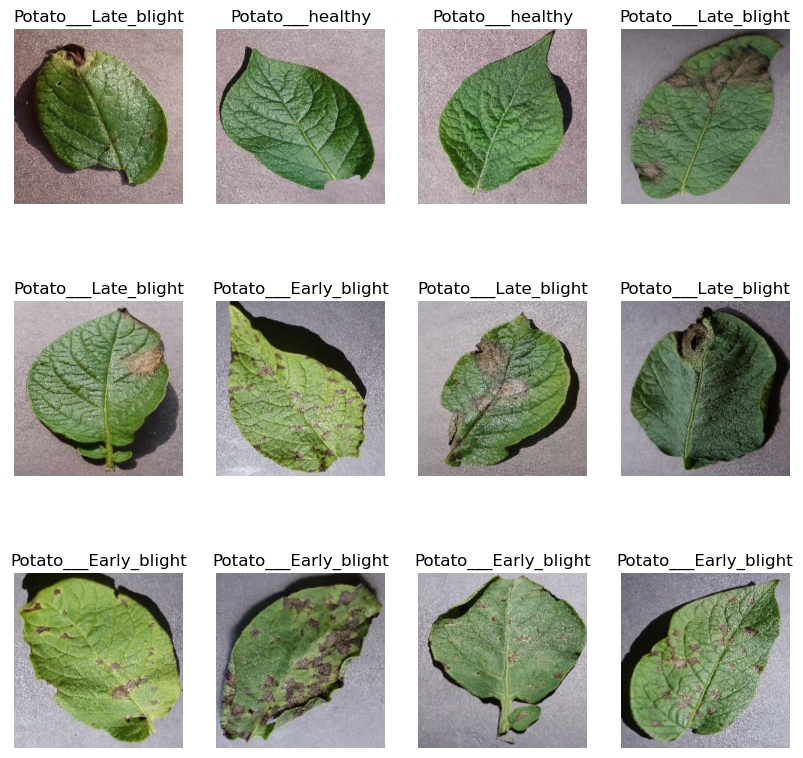

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')
    

In [8]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNEL=3
EPOCHS=25

In [9]:
train_size=0.8
len(dataset)*0.8

54.400000000000006

In [10]:
train_ds=dataset.take(54)
test_ds=dataset.skip(54)

In [11]:
len(test_ds),len(train_ds)

(14, 54)

In [12]:
val_size=0.1
len(dataset)*0.1

6.800000000000001

In [13]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [15]:
len(train_ds)+len(val_ds)+len(test_ds)

68

In [16]:
def get_dataset_patition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size)
    
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    
    test_ds=ds.skip(train_size+val_size)
    
    return train_ds,val_ds,test_ds

In [17]:
train_ds,val_ds,test_ds=get_dataset_patition(dataset)

In [18]:
len(train_ds)+len(val_ds)+len(test_ds)

68

In [19]:
train_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 266, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
resize_rescale=tf.keras.Sequential([
tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255) 

])

In [21]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip(),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [22]:
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout

In [41]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
n_classes=3 
model=tf.keras.models.Sequential([
    resize_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    Dropout(0.2),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    Dropout(0.2),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    Dropout(0.2),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    Dropout(0.2),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    Dropout(0.2),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    Dropout(0.2),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,'relu'),
    Dense(n_classes,'softmax')
   
])

model.build(input_shape=input_shape)

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 dropout (Dropout)           (32, 254, 254, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                      

In [43]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [53]:
history=model.fit(train_ds,batch_size=BATCH_SIZE,epochs=25,validation_data=val_ds,verbose=1)

Epoch 1/25
54/54 [==============================] - 84s 2s/step - loss: 0.1429 - accuracy: 0.9454 - val_loss: 0.1673 - val_accuracy: 0.9740
Epoch 2/25
54/54 [==============================] - 85s 2s/step - loss: 0.1629 - accuracy: 0.9354 - val_loss: 0.3365 - val_accuracy: 0.9219
Epoch 3/25
54/54 [==============================] - 81s 1s/step - loss: 0.0836 - accuracy: 0.9730 - val_loss: 0.1007 - val_accuracy: 0.9896
Epoch 4/25
54/54 [==============================] - 80s 1s/step - loss: 0.0914 - accuracy: 0.9665 - val_loss: 0.1710 - val_accuracy: 0.9792
Epoch 5/25
54/54 [==============================] - 84s 2s/step - loss: 0.0584 - accuracy: 0.9789 - val_loss: 0.1562 - val_accuracy: 0.9740
Epoch 6/25
54/54 [==============================] - 81s 1s/step - loss: 0.0466 - accuracy: 0.9865 - val_loss: 0.1238 - val_accuracy: 0.9688
Epoch 7/25
54/54 [==============================] - 81s 1s/step - loss: 0.0703 - accuracy: 0.9730 - val_loss: 0.1758 - val_accuracy: 0.9635
Epoch 8/25
54/54 [==

In [54]:
model.evaluate(test_ds)

8/8 [==============================] - 2s 157ms/step - loss: 0.0507 - accuracy: 0.9957


[0.05065087229013443, 0.9956896305084229]

In [59]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [60]:
history.epoch[-1]+1

25

Text(0.5, 1.0, 'Training and Validation loss')

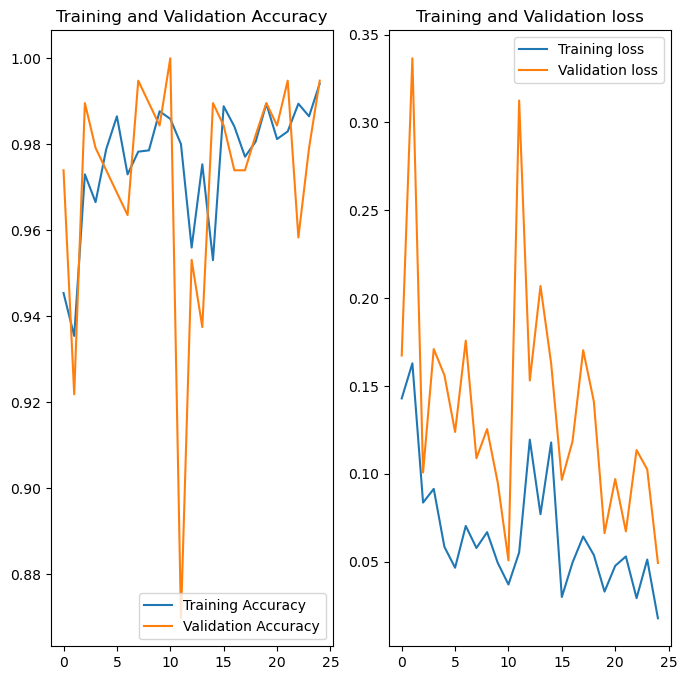

In [61]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(history.epoch[-1]+1),acc,label='Training Accuracy')
plt.plot(range(history.epoch[-1]+1),val_acc,label='Validation Accuracy')
plt.legend(loc=4)
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(history.epoch[-1]+1),loss,label='Training loss')
plt.plot(range(history.epoch[-1]+1),val_loss,label='Validation loss')
plt.legend(loc=1)
plt.title('Training and Validation loss')

In [62]:
import numpy as np
np.argmax([9.9056154e-01 ,9.4385101e-03 ,1.1393008e-08])


0

first image to predict
first image actual label: Potato___Late_blight
1/1 [==============================] - 0s 417ms/step
Potato___Late_blight


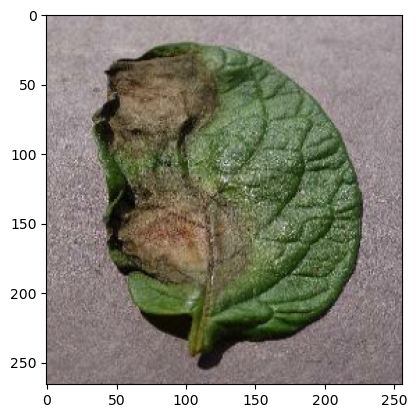

In [63]:
for image_batch,label_batch in dataset.take(1):
    print('first image to predict')
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    print('first image actual label:',class_name[label_batch[0].numpy()])
    
    batch_prediction=model.predict(image_batch)
    print(class_name[np.argmax(batch_prediction[0])])

In [14]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img)
    img_array=tf.expand_dims(img_array,0) # create a batch
    prediction=model.predict(img_array)
    predicted_class=class_name[np.argmax(prediction[0])]
    confidence=round(100*(np.max(prediction[0])))
    return predicted_class,confidence
       
    

1/1 [==============================] - 0s 28ms/step


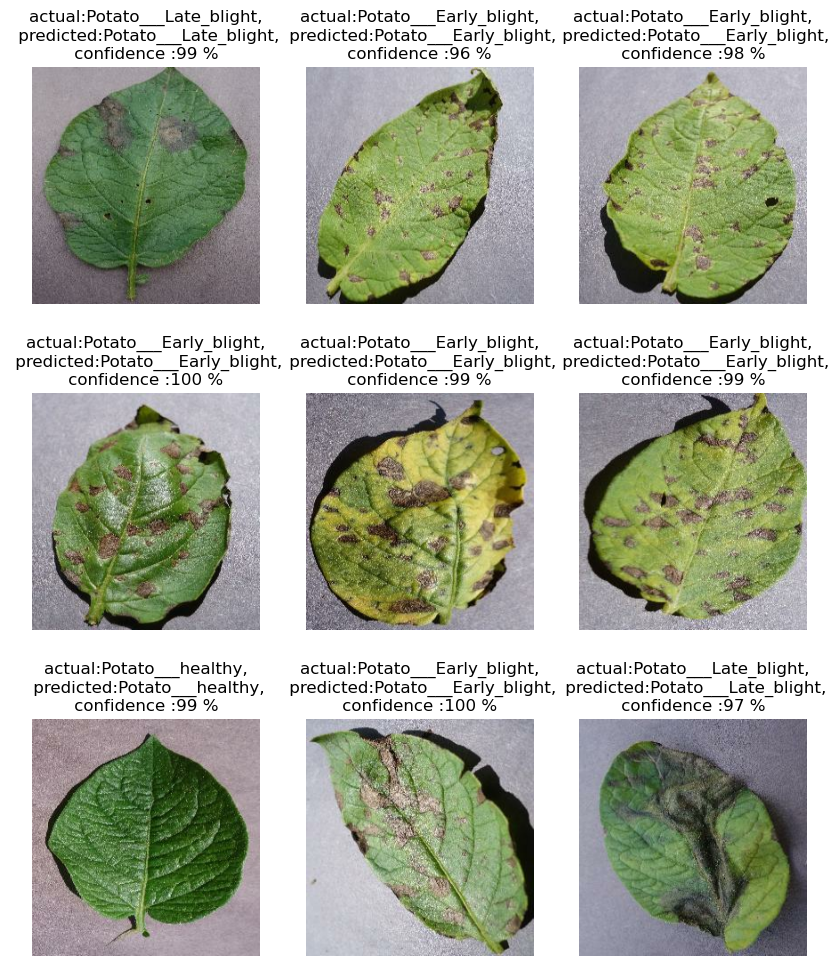

In [65]:
plt.figure(figsize=(10,12))
for images,labels in test_ds.take(1):
     for i in range (9):
            ax=plt.subplot(3,3,i+1)
            
            plt.imshow(images[i].numpy().astype('uint8'))
            
            actual_class=class_name[labels[i]]
            predicted_class,confidence=predict(model,images[i].numpy())
            plt.title(f'actual:{actual_class},\n predicted:{predicted_class},\n confidence :{confidence} % ')
            plt.axis('off')

In [66]:
model_version=2
model.save(f'../Potato-desease/saved_model/{model_version}')

INFO:tensorflow:Assets written to: ../Potato-desease/saved_model/2\assets


INFO:tensorflow:Assets written to: ../Potato-desease/saved_model/2\assets


In [2]:
model=tf.keras.models.load_model("../Potato-desease/saved_model/2/")

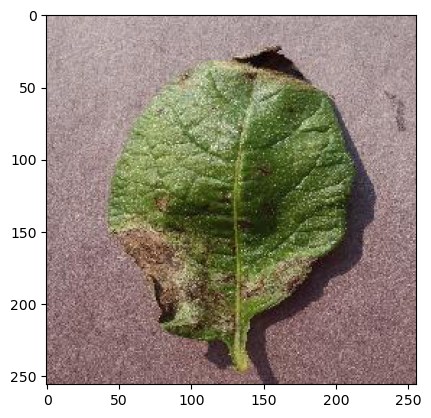

In [15]:
img=plt.imread("../Potato-desease/Dataset/potato_dataset/Potato___Late_blight/00b1f292-23dd-44d4-aad3-c1ffb6a6ad5a___RS_LB 4479.JPG")
plt.imshow(img)

In [18]:
import numpy as np

In [19]:
class_name=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
predict(model,img)

1/1 [==============================] - 0s 15ms/step


('Potato___Late_blight', 95)